# Time series Analysis-Perrin Freres champagne

The Dataset consists of the sales data of champagnes of a company named 'Perrin Freres'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
df = pd.read_excel('C:\\Users\\ARUN PRAVEEN\\Desktop\\perrinchampagne2.xlsx')
df.head()


,Month,sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [3]:
#date range
dates = pd.date_range(start='1964-01-01', freq='MS', periods=len(df))
dates[0:5]

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [4]:
df.set_index(dates,inplace=True)

In [5]:
salests=df['sales']
salests[0:5]


1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Freq: MS, Name: sales, dtype: int64

In [6]:
df1 = pd.DataFrame(salests.copy())
df1.head()

,sales
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


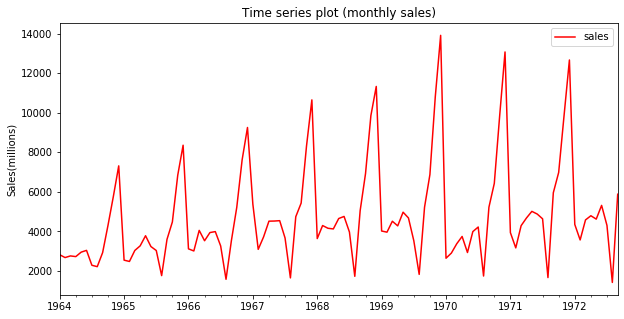

In [7]:
#Time series plot 
df1.plot(figsize=(10, 5), color= 'red')
plt.legend()
plt.ylabel('Sales(millions)')
plt.title('Time series plot (monthly sales)')
plt.show()

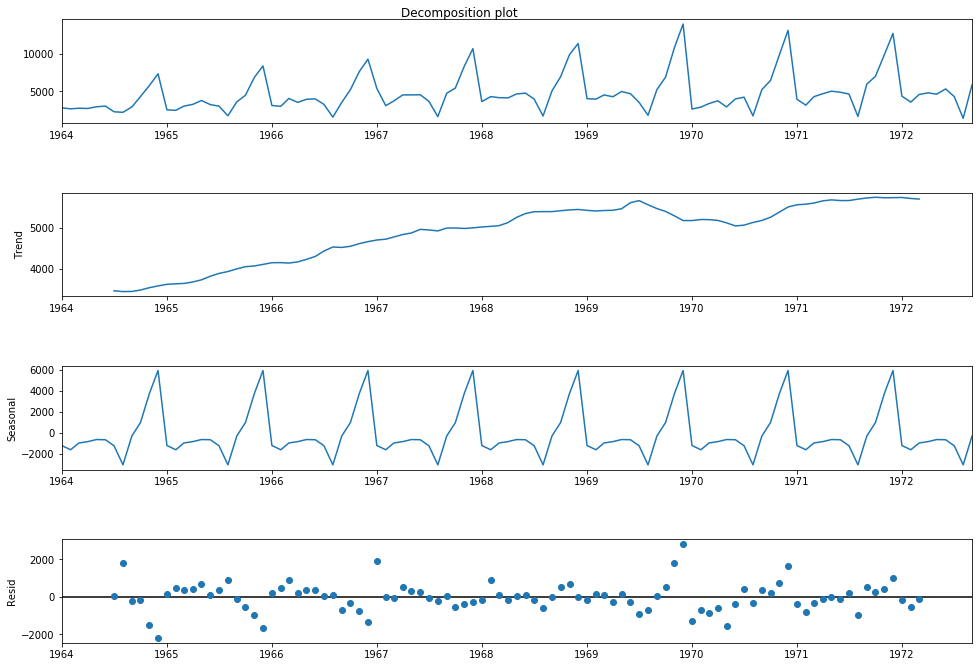

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(df1, model='additive', freq = 12)
fig = decomposition.plot()
fig.set_size_inches(15,10)
fig.suptitle('Decomposition plot')
plt.show()

In [9]:
#Modelling

In [10]:
time = [i+1 for i in range(len(df))]

In [11]:
# Splitting Train and Test Length
train_len = int(np.ceil(len(df) * 0.75))
train_len

79

In [12]:
df2 = df1.copy()
df2['time'] = time
train=df2[0:train_len] 
test=df2[train_len:]

In [13]:
print('The train data length ==',len(train))
print('The test data length ==',len(test))

The train data length == 79
The test data length == 26


In [14]:

x_train = train.drop('sales',axis=1)
x_test = test.drop('sales',axis=1)
y_train = train[['sales']]
y_test = test[['sales']]

In [15]:
#fitting regression model
from sklearn.linear_model import LinearRegression
mod= LinearRegression()

In [16]:
mod.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pred=mod.predict(x_test)

In [18]:
y_test['RegOnTime'] = pred

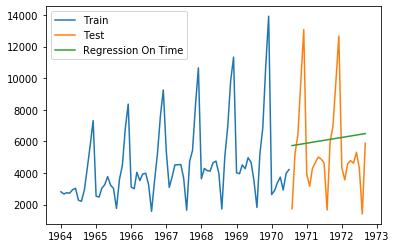

In [19]:
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')
plt.show()